In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [57]:
airline=pd.read_csv(r"C:\Users\Shivam\Downloads\EastWestAirlines.csv")
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [58]:
airline.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [59]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [63]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [64]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airline.iloc[:,1:])

In [65]:
df_norm.iloc[:,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


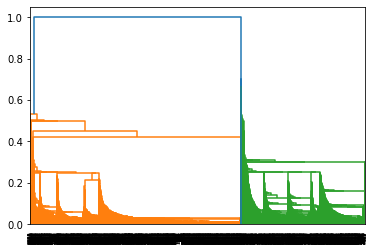

In [66]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [67]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [68]:
hc.fit_predict(df_norm)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [69]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
#Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [70]:
airline['h_clusterid'] = y_hc 

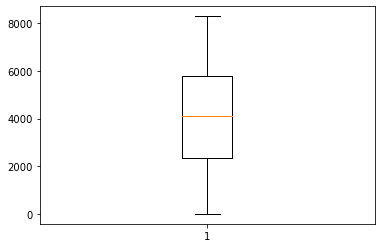

In [71]:
import matplotlib.pyplot as plt
plt.boxplot(airline["Days_since_enroll"])
plt.show()

In [72]:
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [73]:
airline.groupby(["h_clusterid"])["ID"].apply(lambda x:tuple(x))

h_clusterid
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
2                                              (3606,)
3                                              (2862,)
4                                               (915,)
Name: ID, dtype: object

In [75]:
airline[airline["ID"].isin(["13","14","15"])]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid


In [76]:
airline=pd.read_csv(r"C:\Users\Shivam\Downloads\EastWestAirlines.csv")
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [77]:
df_norm = norm_func(airline.iloc[:,1:])

In [78]:
from sklearn.cluster import KMeans

In [79]:
model_kmeans = KMeans(n_clusters=5) 
model_kmeans.fit(df_norm)

KMeans(n_clusters=5)

In [80]:
model_kmeans.labels_

array([0, 0, 0, ..., 1, 4, 4])

In [81]:
md=pd.Series(model_kmeans.labels_)

In [82]:
airline["labels"]=pd.Series(model_kmeans.labels_)

In [83]:
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [84]:
airline.groupby(["labels"])["ID"].apply(lambda x:tuple(x))

labels
0    (1, 2, 3, 4, 6, 11, 13, 14, 15, 23, 24, 25, 26...
1    (5, 9, 10, 12, 16, 17, 19, 20, 21, 29, 36, 39,...
2    (8, 18, 22, 30, 37, 40, 43, 46, 48, 54, 58, 83...
3    (7, 31, 33, 45, 57, 59, 61, 68, 73, 74, 76, 78...
4    (1141, 1445, 1564, 1567, 1568, 1569, 1586, 196...
Name: ID, dtype: object

In [85]:
airline[airline["ID"].isin(["14","18","27","32"])]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels


In [86]:
#DBSCAN

In [87]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons

In [88]:
x,y=make_moons(100)
data=pd.DataFrame(x)
data.columns=["f1","f2"]
data["class"]=y
data.head()

,f1,f2,class
0,-0.997945,0.064070,0
1,-0.345365,0.938468,0
2,-0.926917,0.375267,0
3,1.718349,-0.195683,1
4,1.900969,0.066116,1


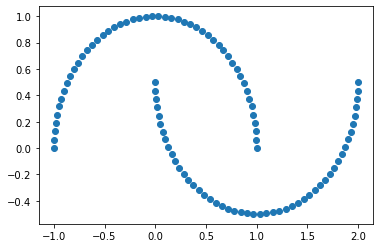

In [89]:
plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)


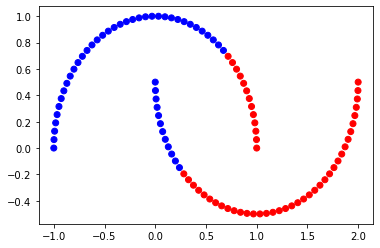

In [90]:
#using kmeans
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
model.fit(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=model.labels_,cmap=plt.cm.bwr_r)

In [91]:
model.labels_


array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0])

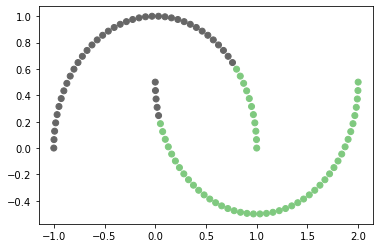

In [92]:
#using hierarchical

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
plt.scatter(data["f1"],data["f2"],c=cluster.fit_predict(data.iloc[:,:2]),cmap=plt.cm.Accent)

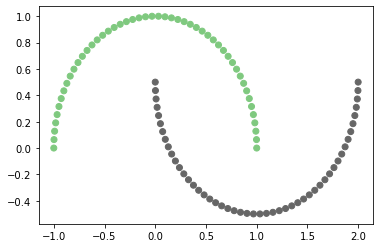

In [93]:
#DBSCAN

dbs=DBSCAN(min_samples=2,eps=0.2)
claas_pr=dbs.fit_predict(data.iloc[:,:2])
plt.scatter(data["f1"],data["f2"],c=claas_pr,cmap=plt.cm.Accent)

In [94]:
claas_pr

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)